# Imports

## Libraries

In [1]:
### Basic Libraries
# !pip install numpy
import numpy as np
# !pip install pandas
import pandas as pd

### Visualization
# !pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install seaborn
import seaborn as sns
sns.set()
sns.set_theme(context='talk', palette='Dark2')
# !pip install ipywidgets
from tqdm.notebook import tqdm, trange
tqdm.pandas(desc="Progress")
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

### Sklearn
# !pip install scikit-learn
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PowerTransformer #StandardScaler
from sklearn.metrics import confusion_matrix

### Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

### UMAP
# !pip install umap-learn
import umap

### Functions
from utils1 import plot_bar_chart, data_transform
from utils2 import (
    apply_optimal_knnimputer,
    pc_analysis,
    plot_inertia_and_silhouette,
    plot_r2_hc,
    plot_dendrogram,
    clusters_comparison,
    groupby_mean,
    visualize_dimensionality_reduction,
    cluster_profiles
)

### Warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Path
temp_path = 'temp\\'

### Autoreload
%load_ext autoreload
%autoreload 2

## Data

In [2]:
success = pd.read_csv('data\\success.csv', index_col=0)
success_no = pd.read_csv('data\\success_no.csv', index_col=0)
success_rb = pd.read_csv('data\\success_rb.csv', index_col=0)

insuccess = pd.read_csv('data\\insuccess.csv', index_col=0)
insuccess_no = pd.read_csv('data\\insuccess_no.csv', index_col=0)
insuccess_rb = pd.read_csv('data\\insuccess_rb.csv', index_col=0)

In [3]:
success

,Course area_Art,Course area_Business sciences,Course area_Engineering and related techniques,Course area_Health,Course area_Information and journalism,Course area_Personal services,Course area_Social services,Course area_Teacher training/trainers and education sciences,Course area_Veterinary sciences,Marital status,...,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Course application mode entry score difference,Course average grade 1st period difference,Course average grade 2nd period difference,Technological course
Userid,,,,,,,,,,,,,,,,,,,,,
699,False,False,False,False,False,False,False,False,False,True,...,6.0,11.0,6.0,117.142857,0.0,70.0,6.638542,22.233160,22.374880,True
456,False,False,False,False,False,False,True,False,False,False,...,6.0,15.0,2.0,110.000000,1.0,55.0,-9.080992,1.810133,3.822871,False
647,False,False,False,False,False,False,True,False,False,True,...,6.0,15.0,1.0,100.000000,0.0,67.0,-3.959358,2.143466,-6.177129,False
383,False,False,False,False,False,False,True,False,False,True,...,6.0,12.0,3.0,103.333333,0.0,93.0,-3.959358,-6.523201,-2.843795,False
1217,False,False,False,False,False,False,True,False,False,True,...,6.0,11.0,NaN,120.000000,0.0,43.0,-5.860550,10.143466,13.822871,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,False,False,False,True,False,False,False,False,False,True,...,8.0,14.0,7.0,121.500000,0.0,44.0,-11.291489,20.656294,23.840012,False
2761,False,False,False,True,False,False,False,False,False,True,...,8.0,10.0,NaN,133.062500,0.0,76.0,0.243258,5.818307,9.515718,False
4410,False,True,False,False,False,False,False,False,False,False,...,5.0,6.0,5.0,143.333333,0.0,34.0,-5.195787,49.001552,48.279857,False


In [4]:
insuccess

,Course area_Art,Course area_Business sciences,Course area_Engineering and related techniques,Course area_Health,Course area_Information and journalism,Course area_Personal services,Course area_Social services,Course area_Teacher training/trainers and education sciences,Course area_Veterinary sciences,Marital status,...,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Course application mode entry score difference,Course average grade 1st period difference,Course average grade 2nd period difference,Technological course
Userid,,,,,,,,,,,,,,,,,,,,,
669,False,False,False,True,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,13.0,0.130827,-124.648360,-123.546782,False
3793,False,False,True,False,False,False,False,False,False,True,...,5.0,5.0,0.0,0.0,0.0,62.0,-7.100000,-85.653629,-87.876999,False
3190,True,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,44.0,-29.047183,-20.698177,-20.828855,False
4100,False,False,False,False,False,False,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,41.0,7.116667,-109.856534,-106.177129,False
2330,True,False,False,False,False,False,False,False,False,False,...,6.0,6.0,0.0,0.0,0.0,52.0,5.568333,-120.815841,-111.959360,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,False,False,False,True,False,False,False,False,False,True,...,8.0,8.0,0.0,0.0,8.0,69.0,-2.656742,-124.648360,-123.546782,False
1517,False,False,False,True,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,62.0,13.243258,-124.648360,-123.546782,False
2822,False,False,False,False,False,False,False,False,True,True,...,5.0,5.0,0.0,0.0,0.0,98.0,-18.760000,-118.593854,-111.608121,False


# Perspectives

In [5]:
# Demographic Traits
demographic_cols = [
    'Marital status', 
    'Nationality', 
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Gender_Male', 
    'Age at enrollment', 
    'International', 
    'Displaced', 
    'Special needs',
    'Social Popularity'
]

# # Academic Performance
# performance_cols = [
#     'Previous qualification',
#     'Previous qualification score',
#     'Entry score',
#     'N units credited 1st period',
#     'N units taken 1st period',
#     'N scored units 1st period',
#     'N units approved 1st period',
#     'Average grade 1st period',
#     'N unscored units 1st period',
#     'N units credited 2nd period',
#     'N units taken 2nd period',
#     'N scored units 2nd period',
#     'N units approved 2nd period',
#     'Average grade 2nd period',
#     'N unscored units 2nd period',
#     'Course application mode entry score difference',
#     'Course average grade 1st period difference',
#     'Course average grade 2nd period difference'
# ]

# # Financial Traits
# financial_cols = [
#     'Debtor',
#     'Regularized Fees',
#     'External Funding',
# ]

# # Course/Program Details
# course_cols = [
#     'Course area_Art', 
#     'Course area_Business sciences', 
#     'Course area_Engineering and related techniques', 
#     'Course area_Health', 
#     'Course area_Information and journalism', 
#     'Course area_Personal services', 
#     'Course area_Social services', 
#     'Course area_Teacher training/trainers and education sciences', 
#     'Course area_Veterinary sciences', 
#     'Application mode', 
#     'Application order',
#     'Morning shift participation',
#     'Technological course'
# ]

# Clustering

### Insucess

#### No scaling

In [6]:
insuccess_no = insuccess_no[demographic_cols]

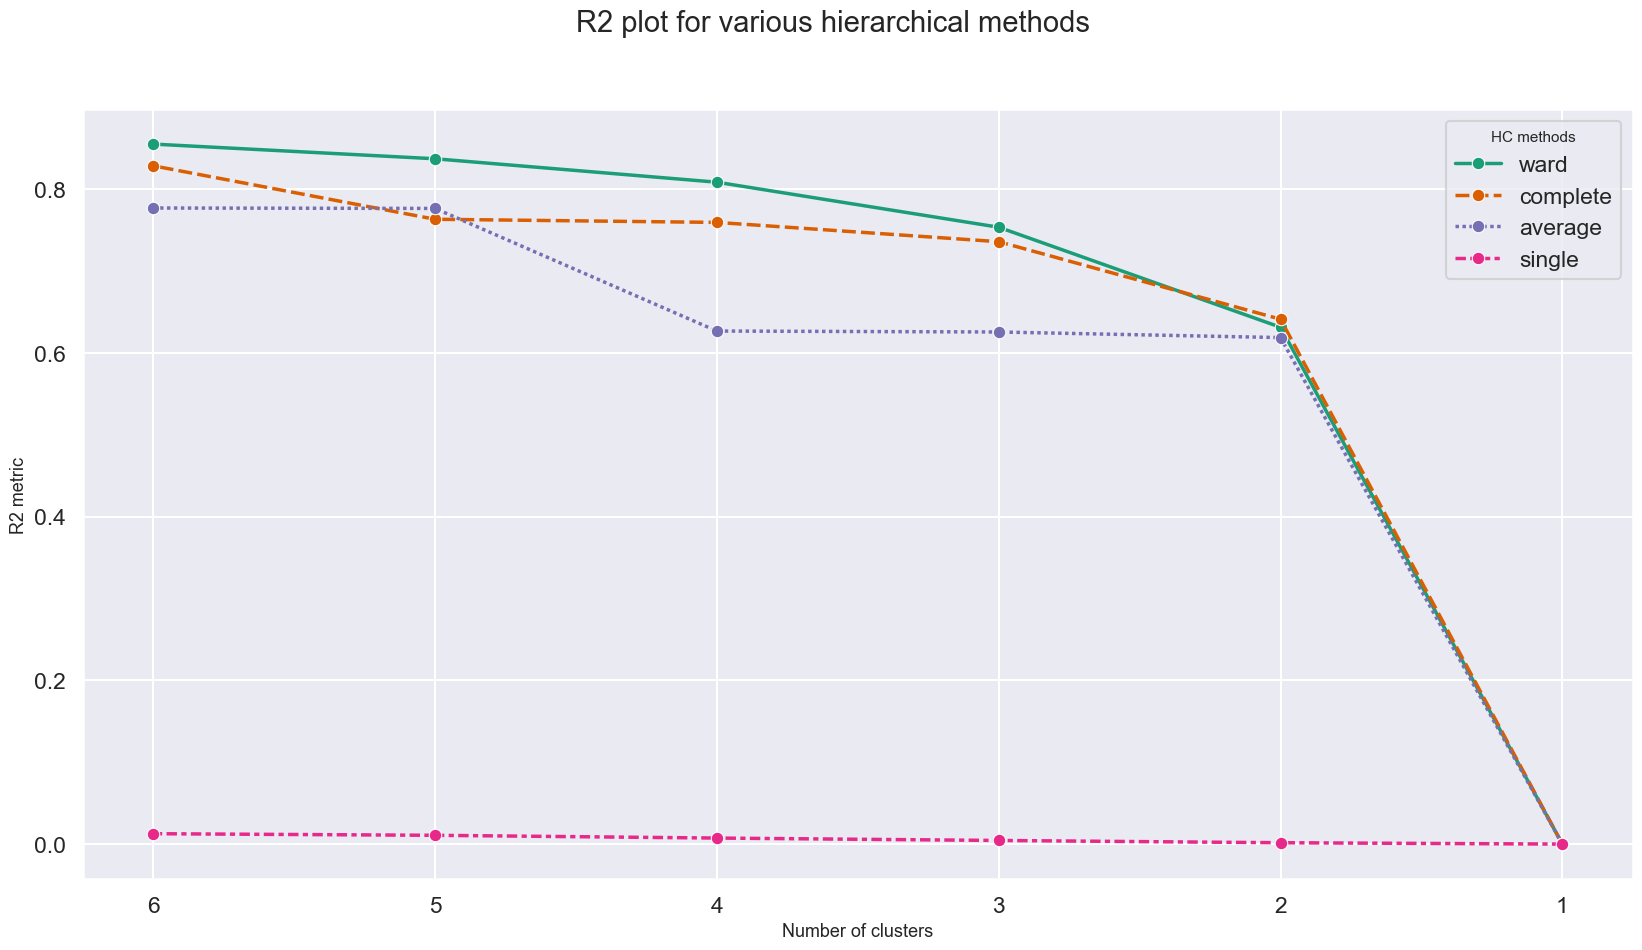

In [139]:
plot_r2_hc(insuccess_no)

##### Single

##### Complete

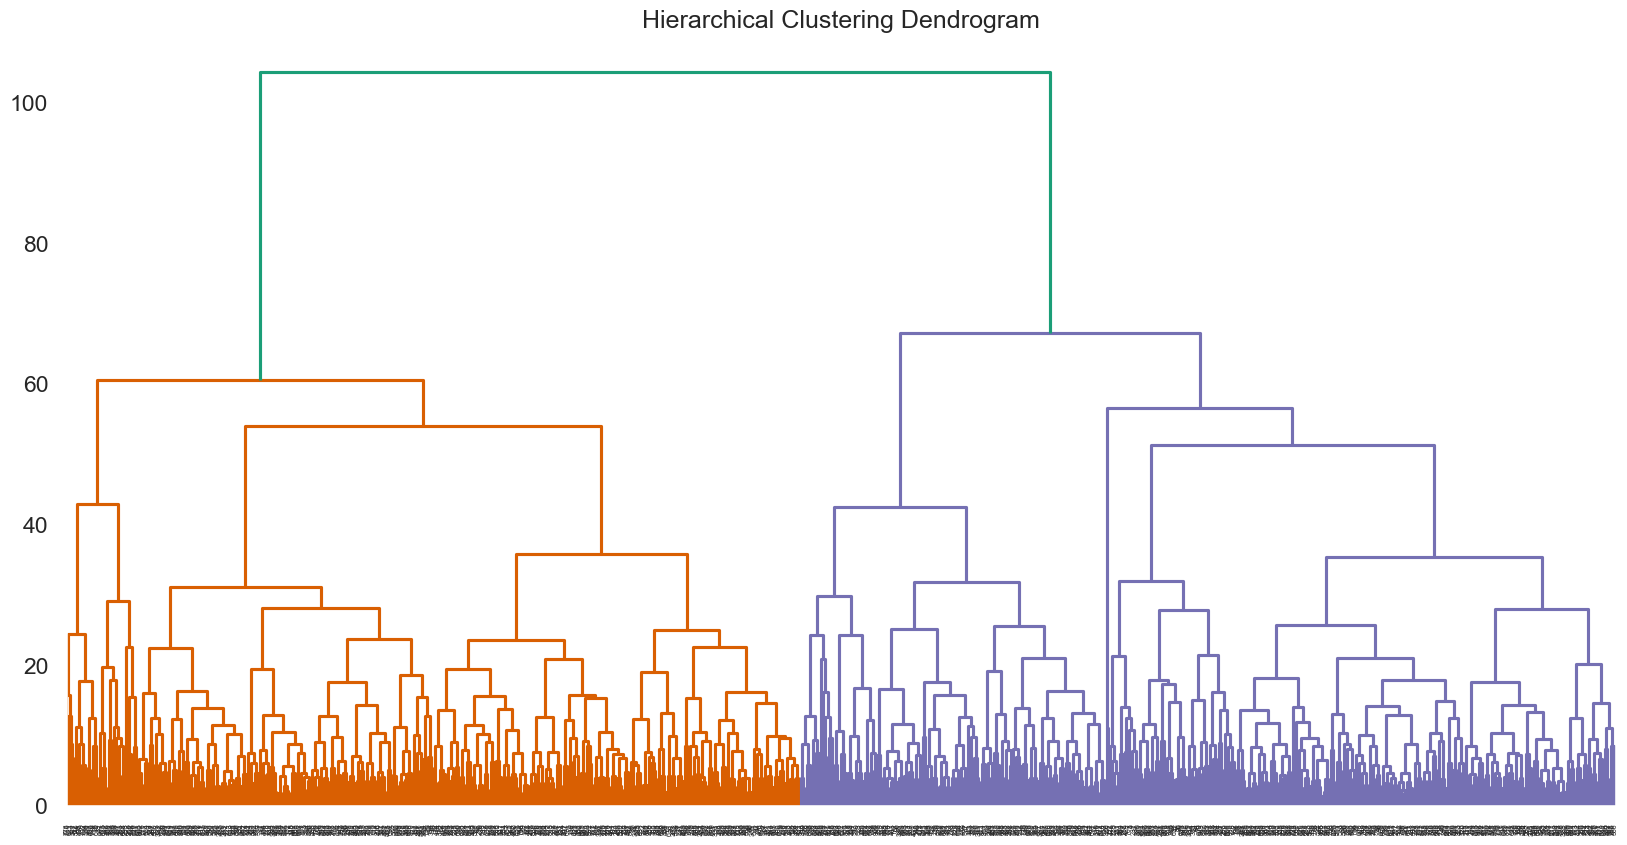

In [140]:
plot_dendrogram(insuccess_no, 'complete')

In [42]:
insuccess['no_complete2'] = AgglomerativeClustering(
    linkage='complete', n_clusters=2
    ).fit_predict(insuccess_no)

insuccess['no_complete4'] = AgglomerativeClustering(
    linkage='complete', n_clusters=4
    ).fit_predict(insuccess_no)

In [142]:
groupby_mean(insuccess, 'no_complete2')

no_complete2,0,1
Course area_Art,0.212500,0.240741
Course area_Business sciences,0.235417,0.194444
Course area_Engineering and related techniques,0.079167,0.069444
Course area_Health,0.100000,0.092593
Course area_Information and journalism,0.041667,0.069444
Course area_Personal services,0.058333,0.046296
Course area_Social services,0.106250,0.078704
Course area_Teacher training/trainers and education sciences,0.027083,0.030093
Course area_Veterinary sciences,0.045833,0.067130
Marital status,0.814583,0.884259


##### Ward

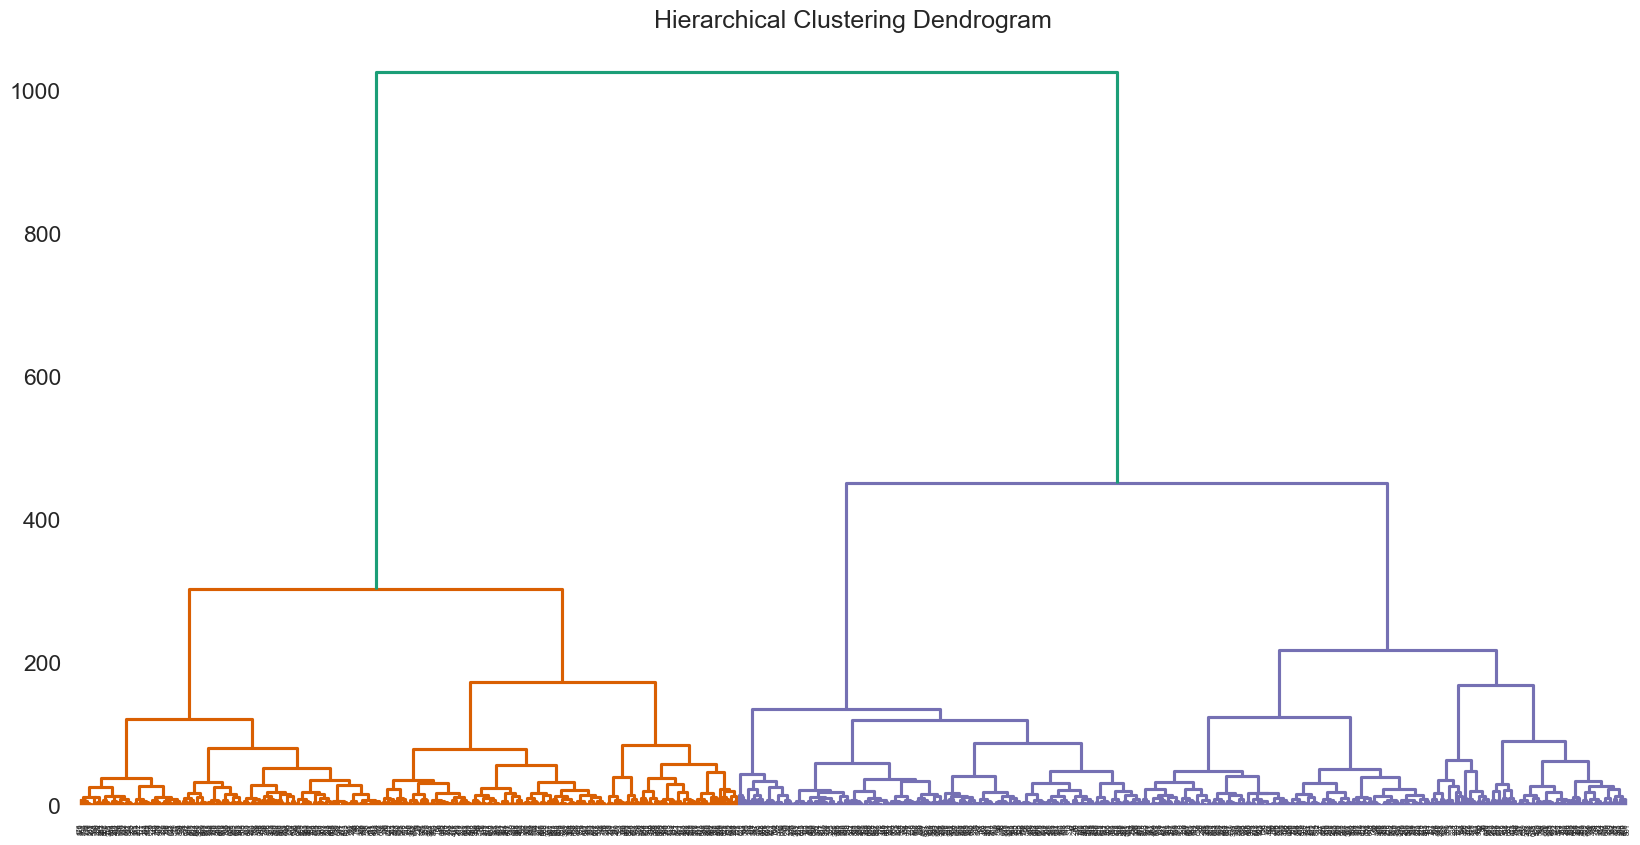

In [15]:
plot_dendrogram(insuccess_no, 'ward')

In [68]:
insuccess['no_ward2'] = AgglomerativeClustering(
    linkage='ward', n_clusters=2
    ).fit_predict(insuccess_no)

insuccess['no_ward4'] = AgglomerativeClustering(
    linkage='ward', n_clusters=4
    ).fit_predict(insuccess_no)

In [69]:
clusters_comparison(insuccess, 'no_complete2', 'no_ward2')

,no_ward2 0 Cluster,no_ward2 1 Cluster
no_complete2 0 Cluster,92,388
no_complete2 1 Cluster,432,0


In [45]:
clusters_comparison(insuccess, 'no_complete4', 'no_ward4')

,no_ward4 0 Cluster,no_ward4 1 Cluster,no_ward4 2 Cluster,no_ward4 3 Cluster
no_complete4 0 Cluster,92,33,0,175
no_complete4 1 Cluster,167,0,223,0
no_complete4 2 Cluster,0,176,0,4
no_complete4 3 Cluster,27,0,15,0


In [141]:
groupby_mean(insuccess, 'no_ward2')

no_ward2,0,1
Course area_Art,0.234733,0.213918
Course area_Business sciences,0.196565,0.242268
Course area_Engineering and related techniques,0.074427,0.074742
Course area_Health,0.097328,0.095361
Course area_Information and journalism,0.062977,0.043814
Course area_Personal services,0.049618,0.056701
Course area_Social services,0.089695,0.097938
Course area_Teacher training/trainers and education sciences,0.028626,0.028351
Course area_Veterinary sciences,0.055344,0.056701
Marital status,0.847328,0.847938


##### Average

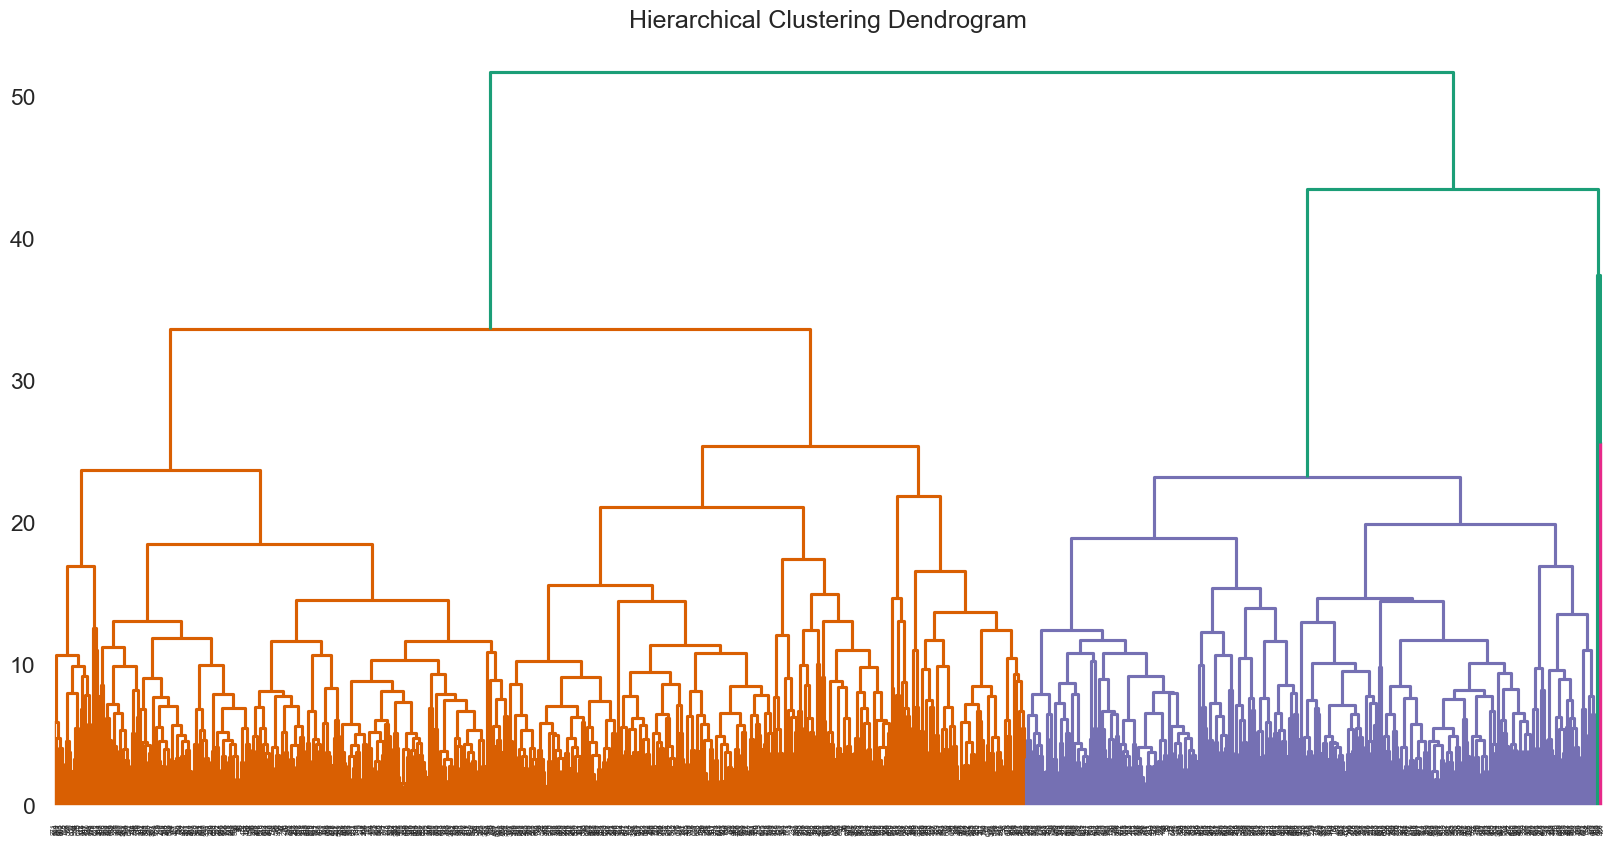

In [19]:
plot_dendrogram(insuccess_no, 'average')

In [143]:
insuccess['no_average2'] = AgglomerativeClustering(
    linkage='average', n_clusters=2
    ).fit_predict(insuccess_no)

In [144]:
clusters_comparison(insuccess, 'no_average2', 'no_ward2')

,no_ward2 0 Cluster,no_ward2 1 Cluster
no_average2 0 Cluster,6,334
no_average2 1 Cluster,518,54


In [146]:
groupby_mean(insuccess, 'no_average2')

no_average2,0,1
Course area_Art,0.214706,0.232517
Course area_Business sciences,0.250000,0.195804
Course area_Engineering and related techniques,0.067647,0.078671
Course area_Health,0.094118,0.097902
Course area_Information and journalism,0.041176,0.062937
Course area_Personal services,0.058824,0.048951
Course area_Social services,0.102941,0.087413
Course area_Teacher training/trainers and education sciences,0.026471,0.029720
Course area_Veterinary sciences,0.058824,0.054196
Marital status,0.852941,0.844406


##### MeanShift

In [63]:
no_meanshift = MeanShift(bandwidth=18, bin_seeding=True, n_jobs=-1).fit(insuccess_no)
insuccess['no_meanshift'] = no_meanshift.labels_

In [64]:
clusters_comparison(insuccess, 'no_meanshift', 'no_ward4')

,no_ward4 0 Cluster,no_ward4 1 Cluster,no_ward4 2 Cluster,no_ward4 3 Cluster
no_meanshift 0 Cluster,166,0,238,0
no_meanshift 1 Cluster,114,0,0,73
no_meanshift 2 Cluster,6,209,0,106


##### UMAP

c:\Users\Afonso Cadete\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
g:\O meu disco\Universidade\3rd year\2nd semester\Machine Learning\II\Project\utils2.py:387: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


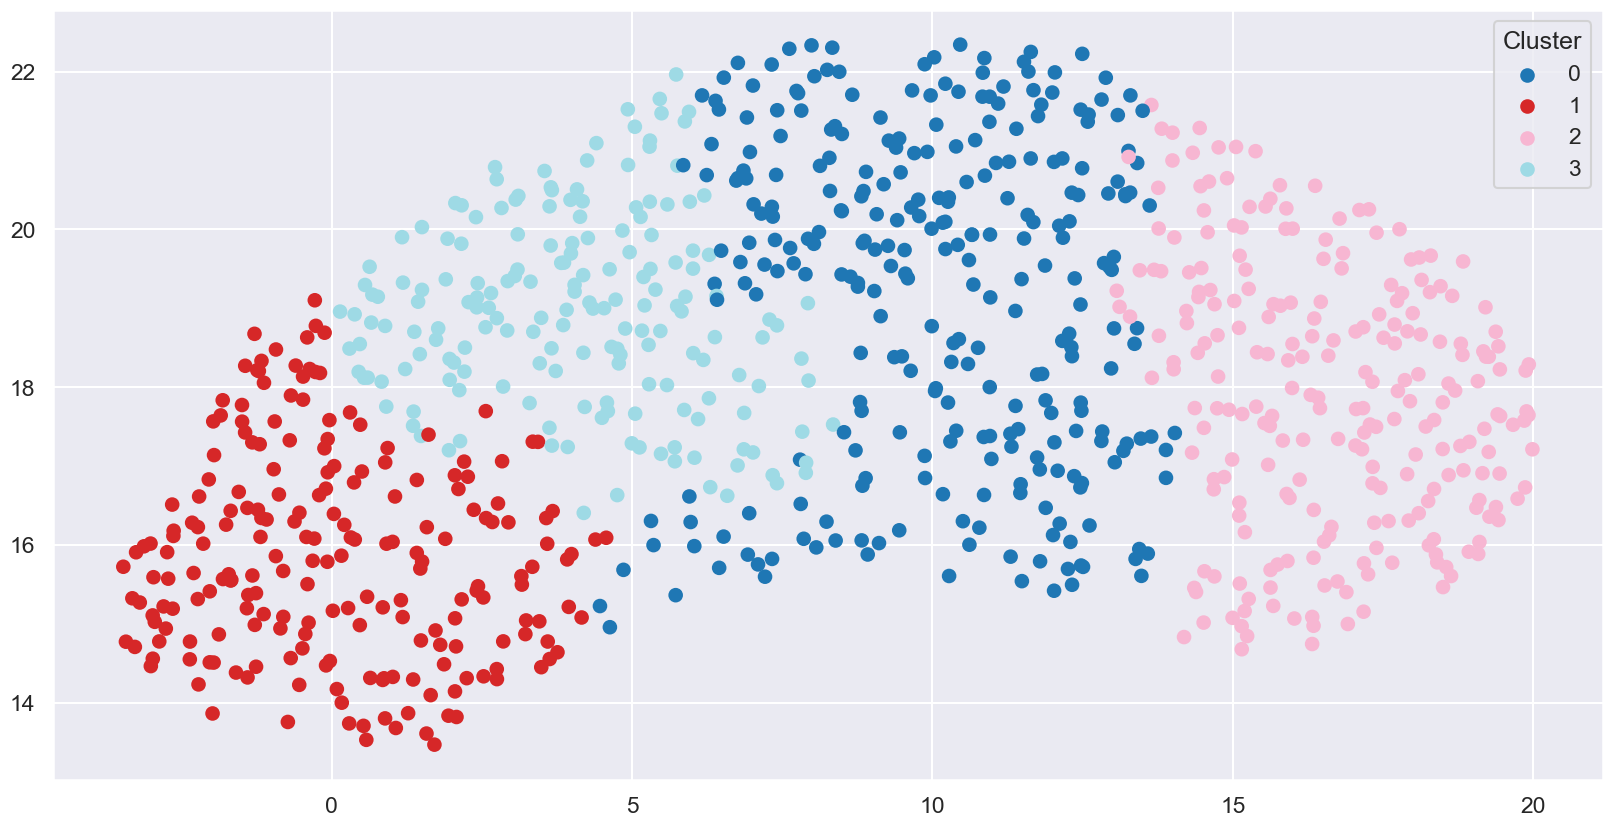

In [65]:
umap_object = umap.UMAP(n_neighbors=160, min_dist=1, random_state=16, n_jobs=-1)
umap_embedding = umap_object.fit_transform(insuccess_no)
visualize_dimensionality_reduction(umap_embedding, insuccess['no_ward4'])

#### Robust

In [26]:
insuccess_rb = insuccess_rb[demographic_cols]

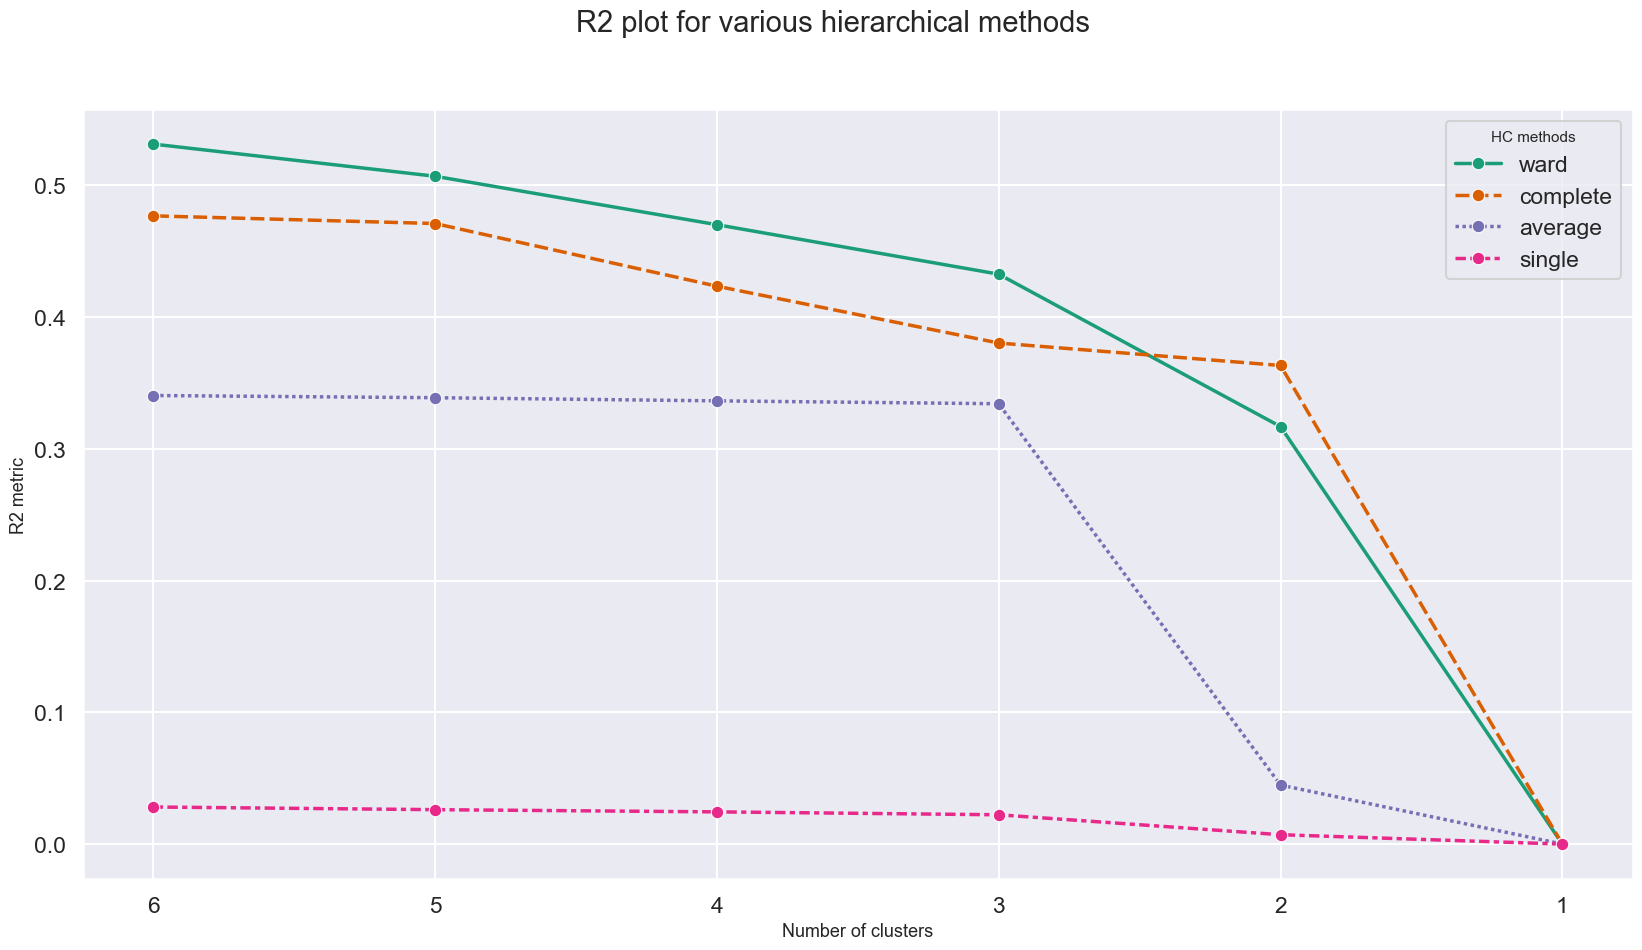

In [27]:
plot_r2_hc(insuccess_rb)

##### Complete

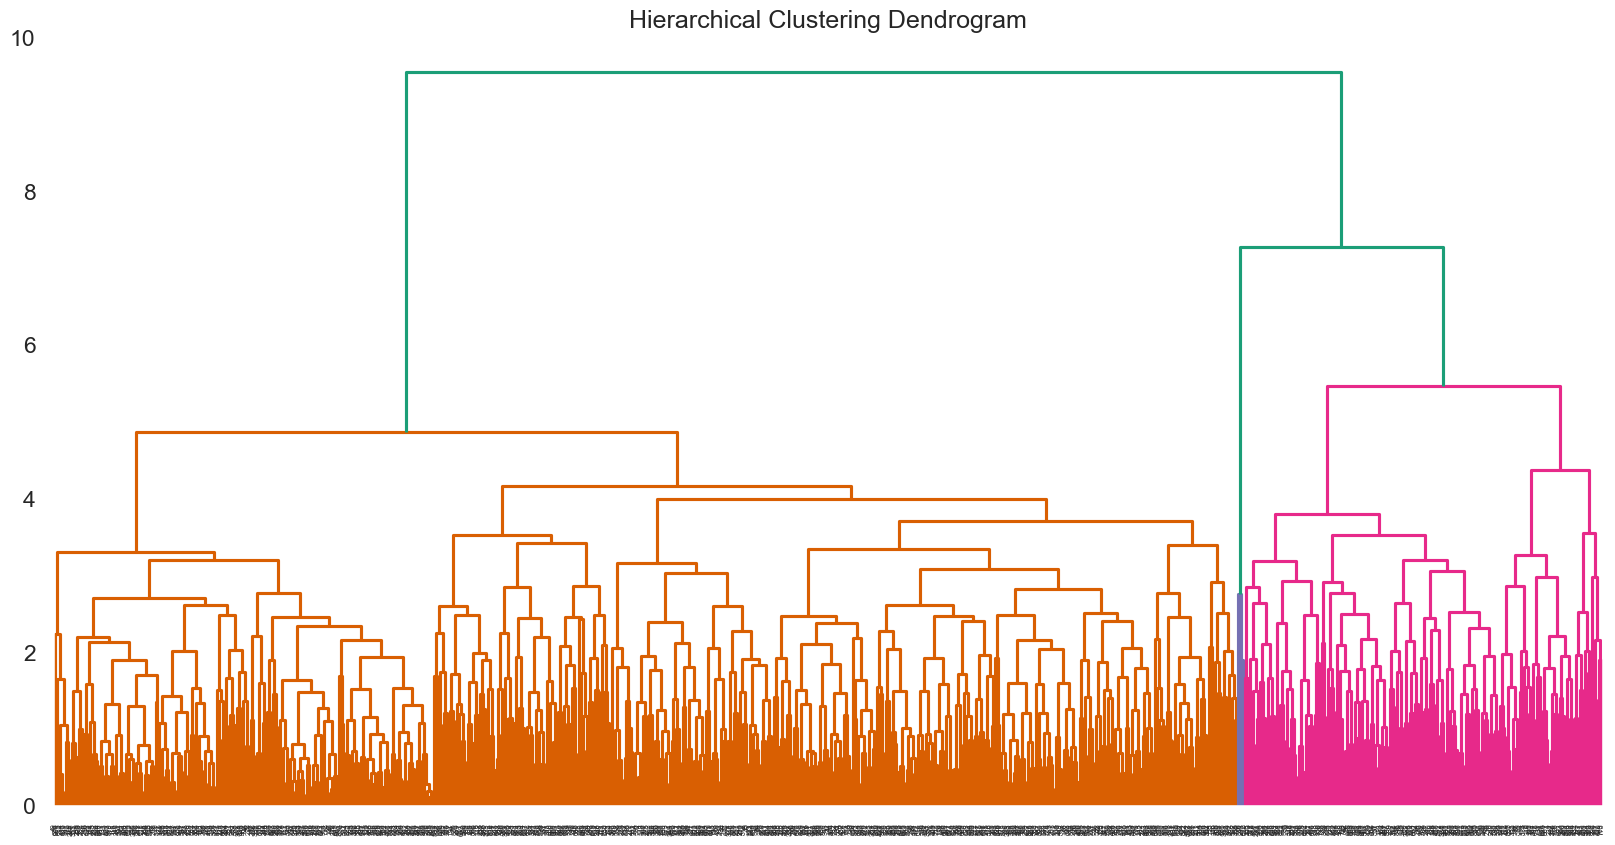

In [28]:
plot_dendrogram(insuccess_rb, 'complete')

In [66]:
insuccess['rb_complete2'] = AgglomerativeClustering(
    linkage='complete', n_clusters=2
    ).fit_predict(insuccess_rb)

In [70]:
clusters_comparison(insuccess, 'no_ward2', 'rb_complete2')

,rb_complete2 0 Cluster,rb_complete2 1 Cluster
no_ward2 0 Cluster,131,393
no_ward2 1 Cluster,84,304


##### Ward

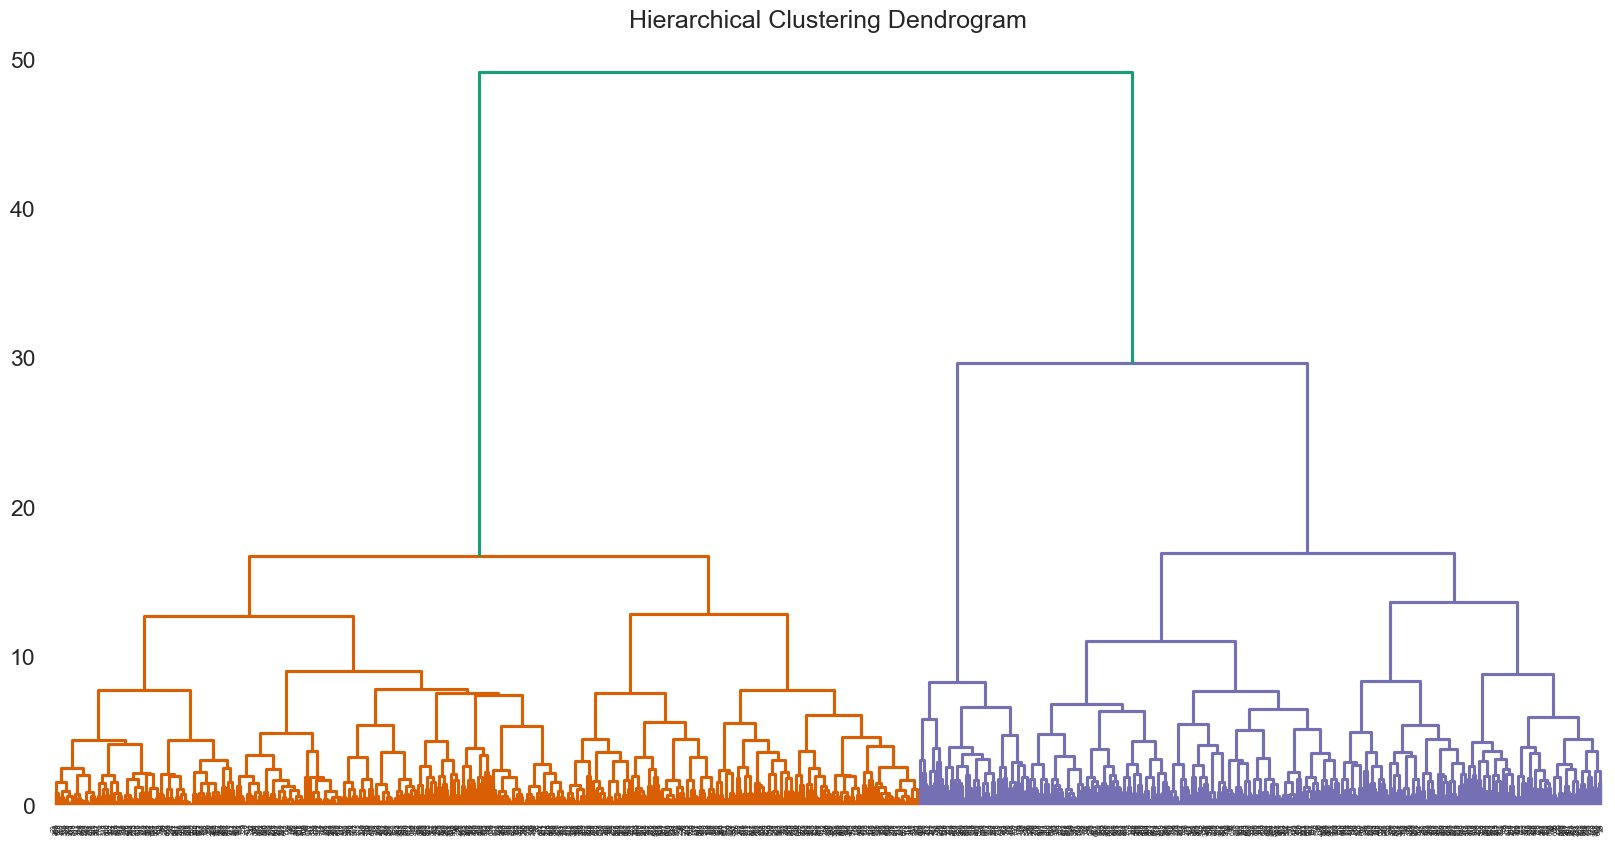

In [31]:
plot_dendrogram(insuccess_rb, 'ward')

In [32]:
insuccess['rb_ward2'] = AgglomerativeClustering(
    linkage='ward', n_clusters=2
    ).fit_predict(insuccess_rb)

insuccess['rb_ward3'] = AgglomerativeClustering(
    linkage='ward', n_clusters=3
    ).fit_predict(insuccess_rb)

In [71]:
clusters_comparison(insuccess, 'rb_complete2', 'rb_ward2')

,rb_ward2 0 Cluster,rb_ward2 1 Cluster
rb_complete2 0 Cluster,215,0
rb_complete2 1 Cluster,187,510


In [72]:
clusters_comparison(insuccess, 'rb_complete2', 'rb_ward3')

,rb_ward3 0 Cluster,rb_ward3 1 Cluster,rb_ward3 2 Cluster
rb_complete2 0 Cluster,151,0,64
rb_complete2 1 Cluster,187,510,0


##### MeanShift

In [88]:
rb_meanshift = MeanShift(bandwidth=1.7, bin_seeding=True, n_jobs=-1).fit(insuccess_rb)
insuccess['rb_meanshift'] = rb_meanshift.labels_

In [89]:
clusters_comparison(insuccess, 'no_meanshift', 'rb_meanshift')

,rb_meanshift 0 Cluster,rb_meanshift 1 Cluster,rb_meanshift 2 Cluster
no_meanshift 0 Cluster,337,24,43
no_meanshift 1 Cluster,154,12,21
no_meanshift 2 Cluster,251,14,56


##### UMAP

c:\Users\Afonso Cadete\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
g:\O meu disco\Universidade\3rd year\2nd semester\Machine Learning\II\Project\utils2.py:387: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


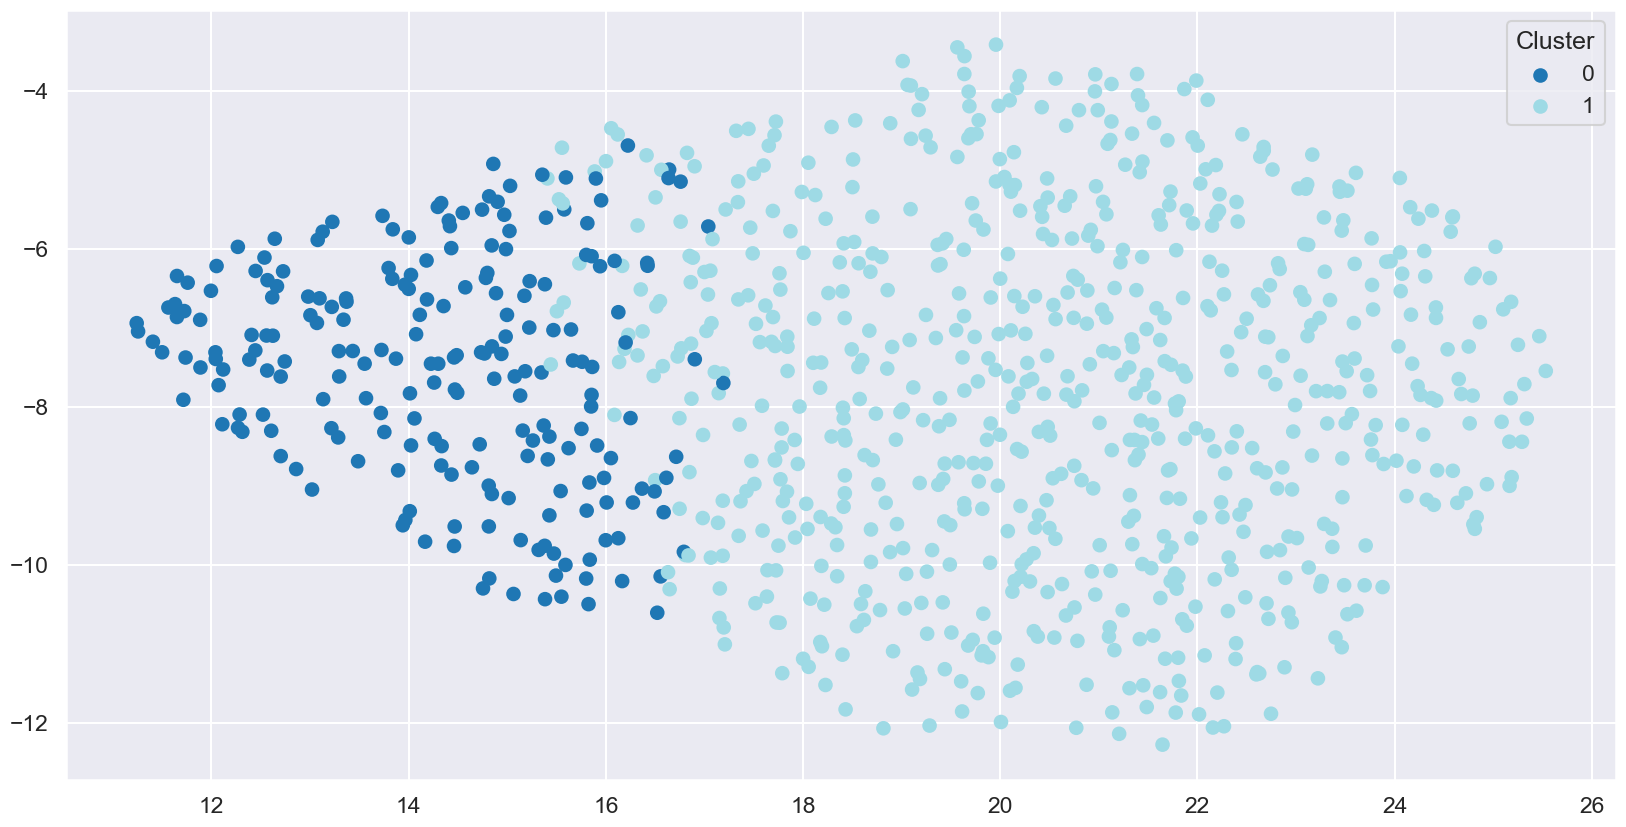

In [90]:
umap_object = umap.UMAP(n_neighbors=160, min_dist=1, random_state=16, n_jobs=-1)
umap_embedding = umap_object.fit_transform(insuccess_rb)
visualize_dimensionality_reduction(umap_embedding, insuccess['rb_complete2'])

### Success

#### No scaling

In [7]:
success_no = success_no[demographic_cols]

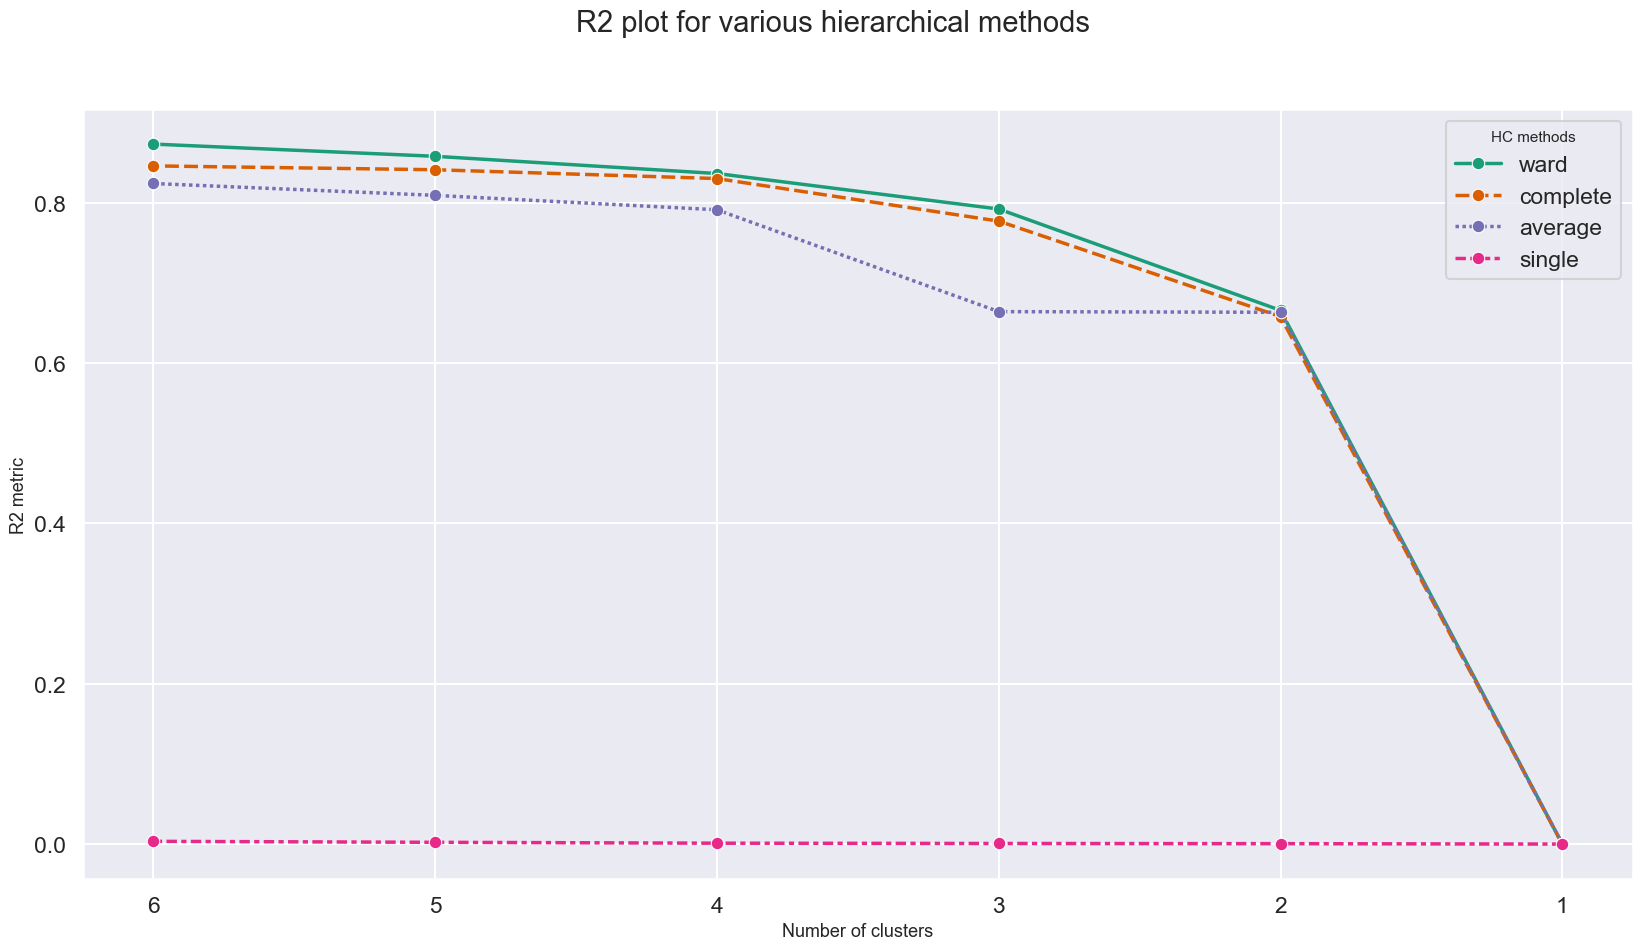

In [92]:
plot_r2_hc(success_no)

##### Complete

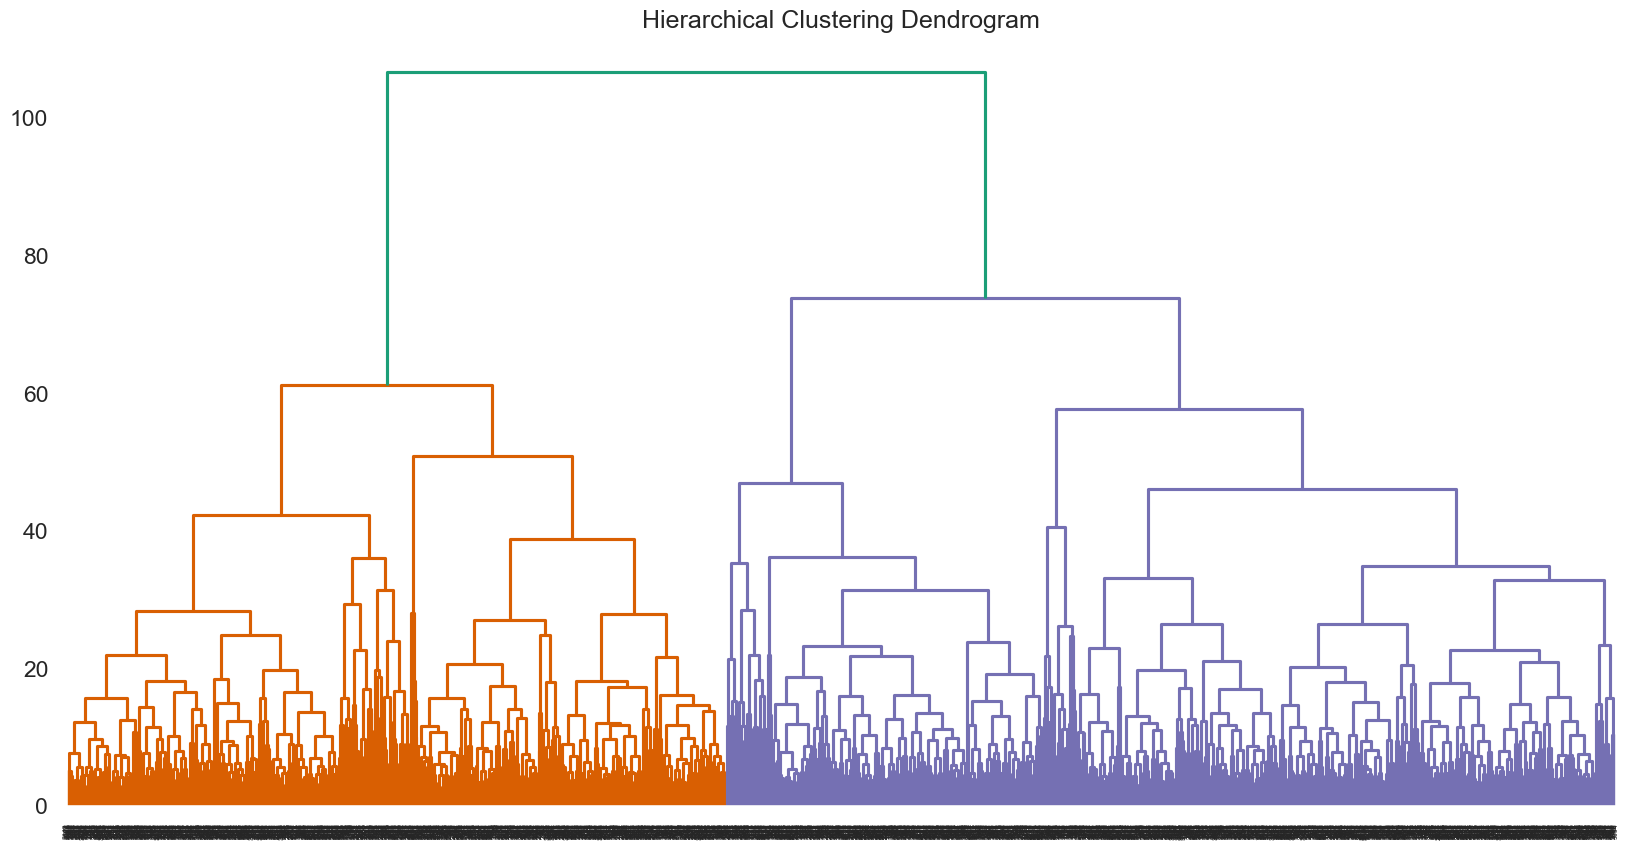

In [93]:
plot_dendrogram(success_no, 'complete')

In [94]:
success['no_complete2'] = AgglomerativeClustering(
    linkage='complete', n_clusters=2
    ).fit_predict(success_no)

In [137]:
groupby_mean(success, 'no_complete2')

no_complete2,0,1
Course area_Art,0.069051,0.064043
Course area_Business sciences,0.199702,0.211474
Course area_Engineering and related techniques,0.034277,0.030020
Course area_Health,0.219076,0.215477
Course area_Information and journalism,0.078987,0.081388
Course area_Personal services,0.064580,0.049366
Course area_Social services,0.142573,0.132088
Course area_Teacher training/trainers and education sciences,0.045703,0.049366
Course area_Veterinary sciences,0.078490,0.085390
Marital status,0.896672,0.894596


##### Ward

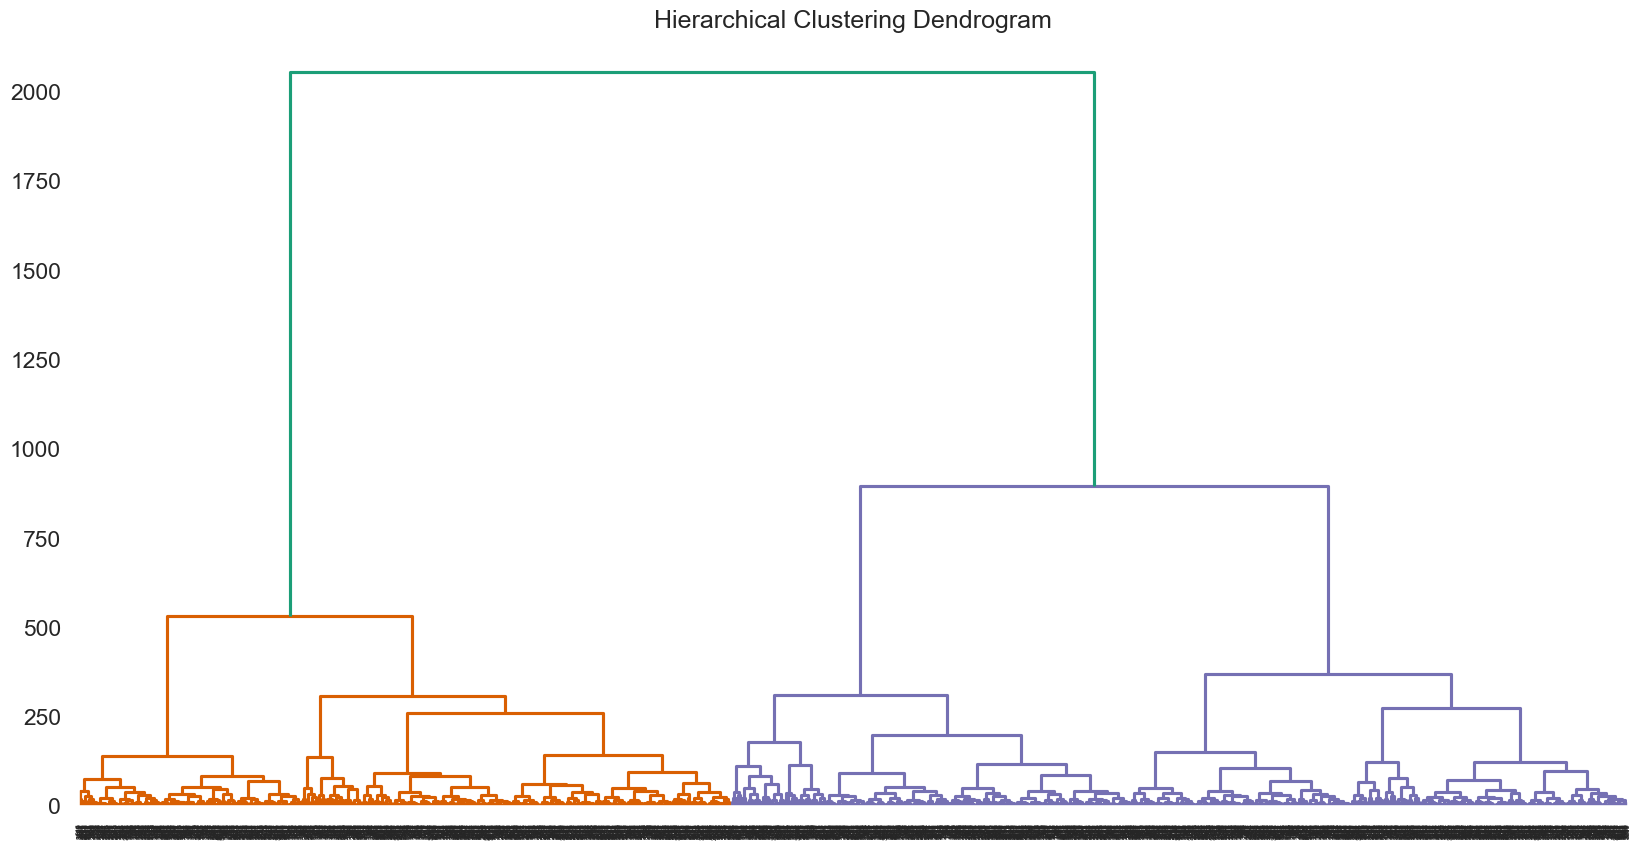

In [8]:
plot_dendrogram(success_no, 'ward')

In [9]:
success['no_ward2'] = AgglomerativeClustering(
    linkage='ward', n_clusters=2
    ).fit_predict(success_no)

success['no_ward3'] = AgglomerativeClustering(
    linkage='ward', n_clusters=3
    ).fit_predict(success_no)

success['no_ward4'] = AgglomerativeClustering(
    linkage='ward', n_clusters=4
    ).fit_predict(success_no)

In [97]:
clusters_comparison(success, 'no_complete2', 'no_ward2')

,no_ward2 0 Cluster,no_ward2 1 Cluster
no_complete2 0 Cluster,533,1480
no_complete2 1 Cluster,1499,0


In [135]:
groupby_mean(success, 'no_ward2')

no_ward2,0,1
Course area_Art,0.068406,0.064865
Course area_Business sciences,0.201280,0.209459
Course area_Engineering and related techniques,0.031988,0.033108
Course area_Health,0.214075,0.222297
Course area_Information and journalism,0.083169,0.075676
Course area_Personal services,0.058071,0.058108
Course area_Social services,0.136319,0.140541
Course area_Teacher training/trainers and education sciences,0.047244,0.047297
Course area_Veterinary sciences,0.080709,0.082432
Marital status,0.886319,0.908784


#### Average

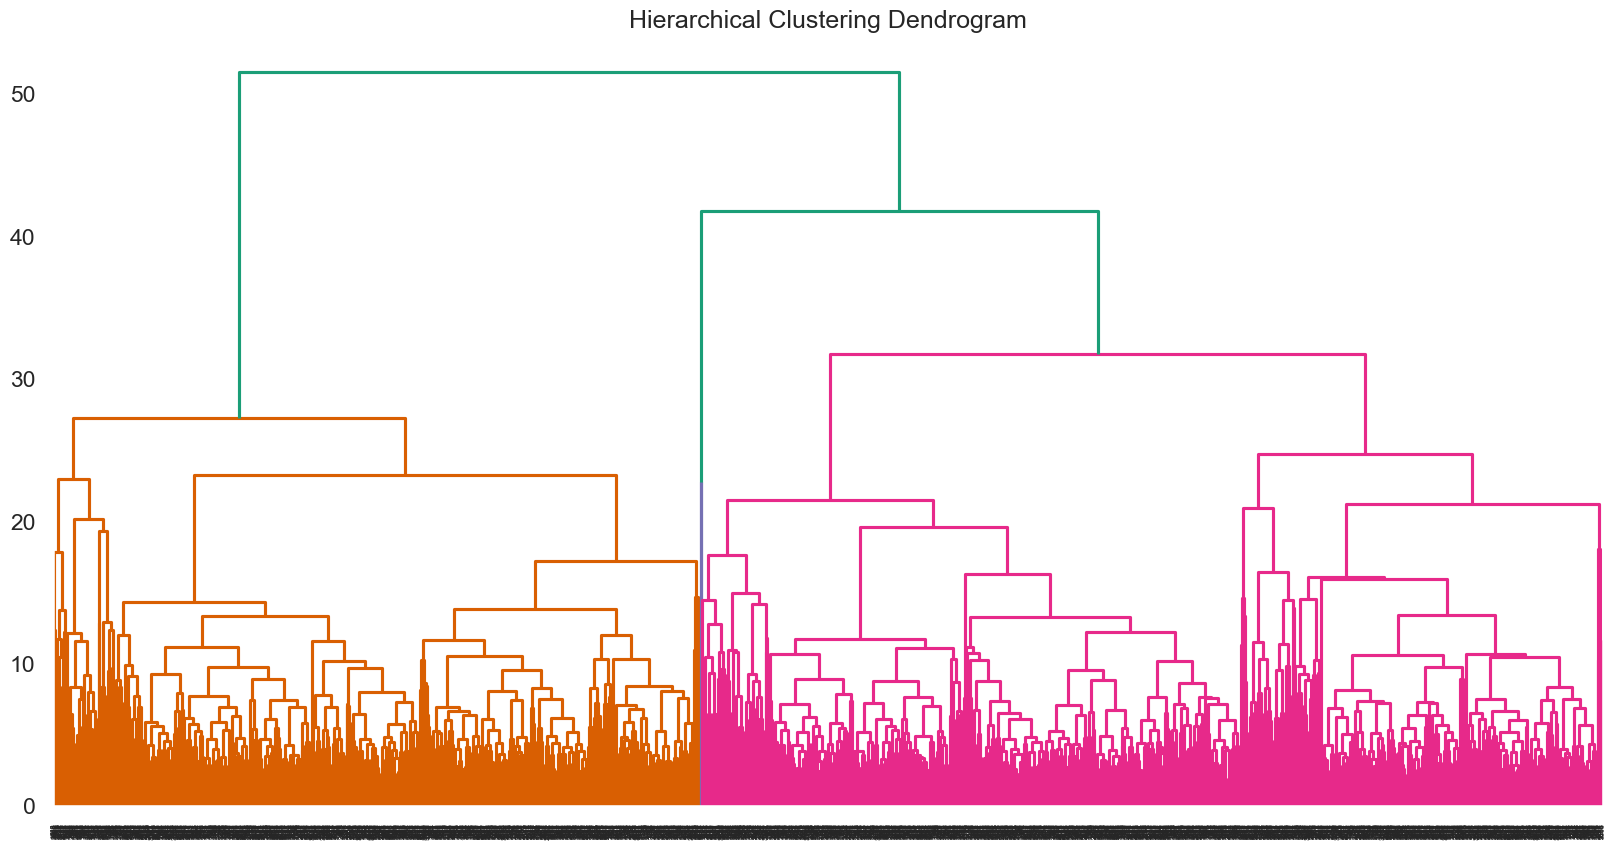

In [104]:
plot_dendrogram(success_no, 'average')

In [106]:
success['no_average2'] = AgglomerativeClustering(
    linkage='average', n_clusters=2
    ).fit_predict(success_no)

In [109]:
clusters_comparison(success, 'no_ward2', 'no_average2')

,no_average2 0 Cluster,no_average2 1 Cluster
no_ward2 0 Cluster,2008,24
no_ward2 1 Cluster,36,1444


In [138]:
groupby_mean(success, 'no_average2')

no_average2,0,1
Course area_Art,0.070939,0.061308
Course area_Business sciences,0.199119,0.212534
Course area_Engineering and related techniques,0.032779,0.032016
Course area_Health,0.214775,0.221390
Course area_Information and journalism,0.082192,0.076975
Course area_Personal services,0.059198,0.056540
Course area_Social services,0.135029,0.142371
Course area_Teacher training/trainers and education sciences,0.046477,0.048365
Course area_Veterinary sciences,0.081703,0.081063
Marital status,0.893346,0.899183


##### MeanShift

In [102]:
no_meanshift = MeanShift(bandwidth=20, bin_seeding=True, n_jobs=-1).fit(success_no)
success['no_meanshift'] = no_meanshift.labels_

In [103]:
clusters_comparison(success, 'no_meanshift', 'no_complete2')

,no_complete2 0 Cluster,no_complete2 1 Cluster
no_meanshift 0 Cluster,574,468
no_meanshift 1 Cluster,1439,0
no_meanshift 2 Cluster,0,1031


##### UMAP

c:\Users\Afonso Cadete\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
g:\O meu disco\Universidade\3rd year\2nd semester\Machine Learning\II\Project\utils2.py:387: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


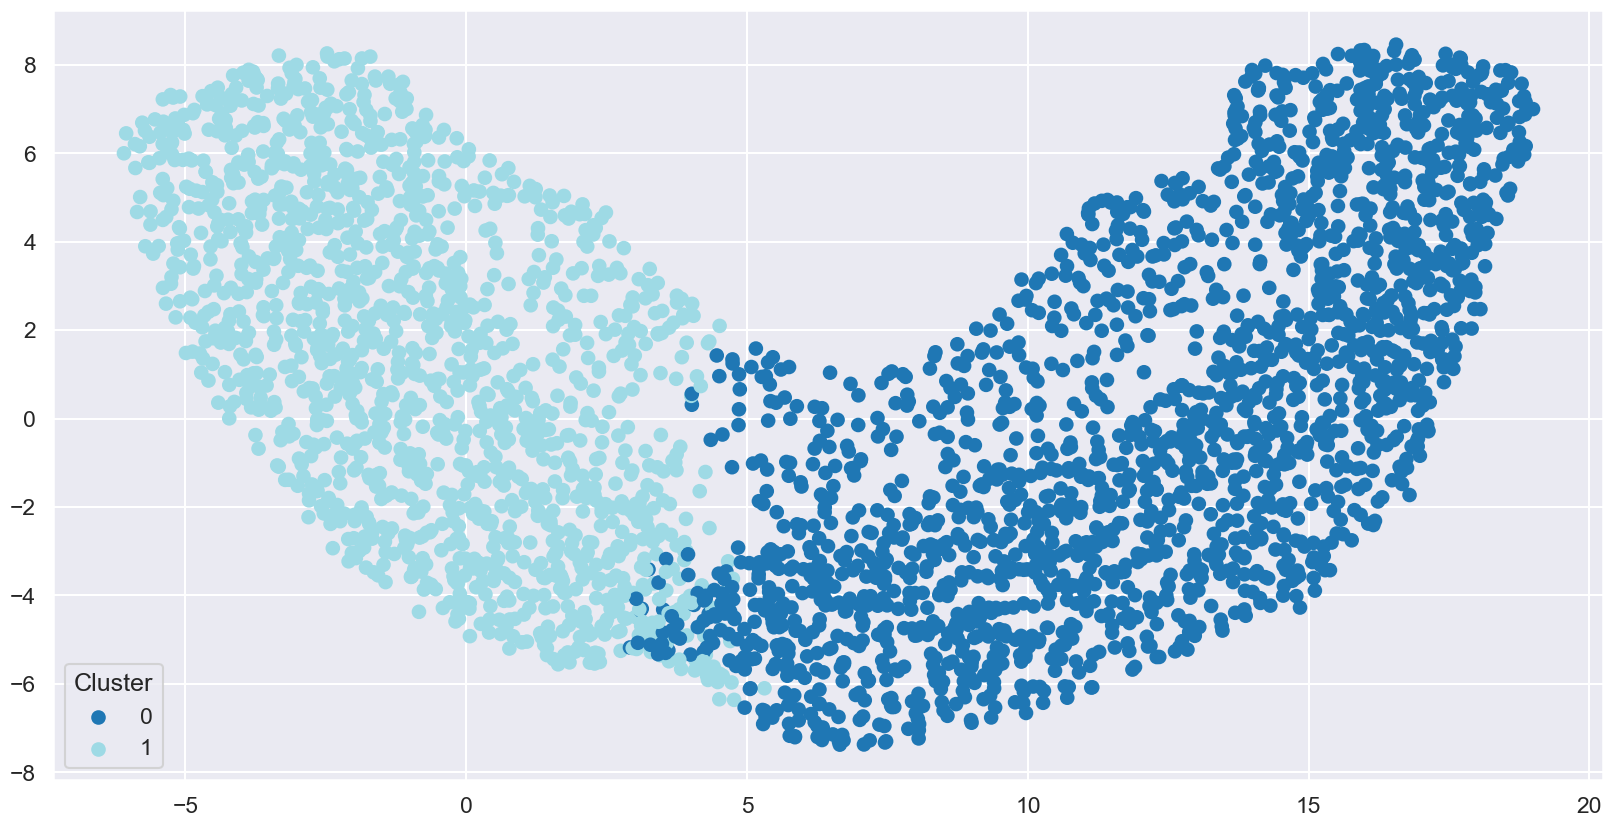

In [111]:
umap_object = umap.UMAP(n_neighbors=160, min_dist=1, random_state=16, n_jobs=-1)
umap_embedding = umap_object.fit_transform(success_no)
visualize_dimensionality_reduction(umap_embedding, success['no_ward2'])

#### Robust

In [112]:
success_rb = success_rb[demographic_cols]

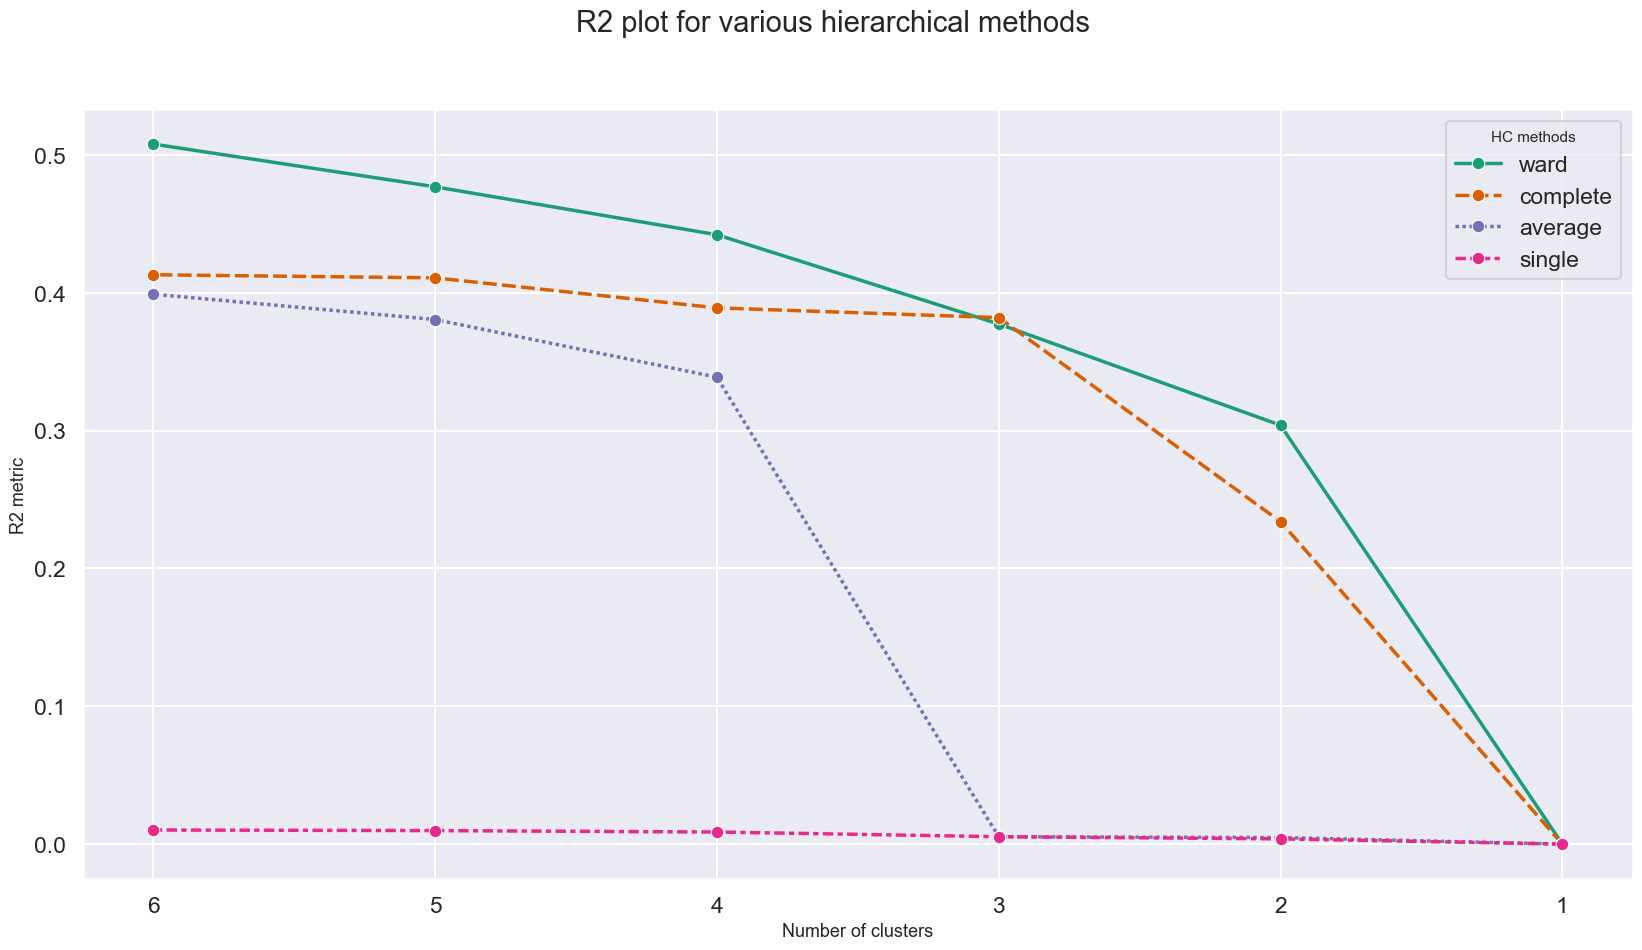

In [113]:
plot_r2_hc(success_rb)

##### Complete

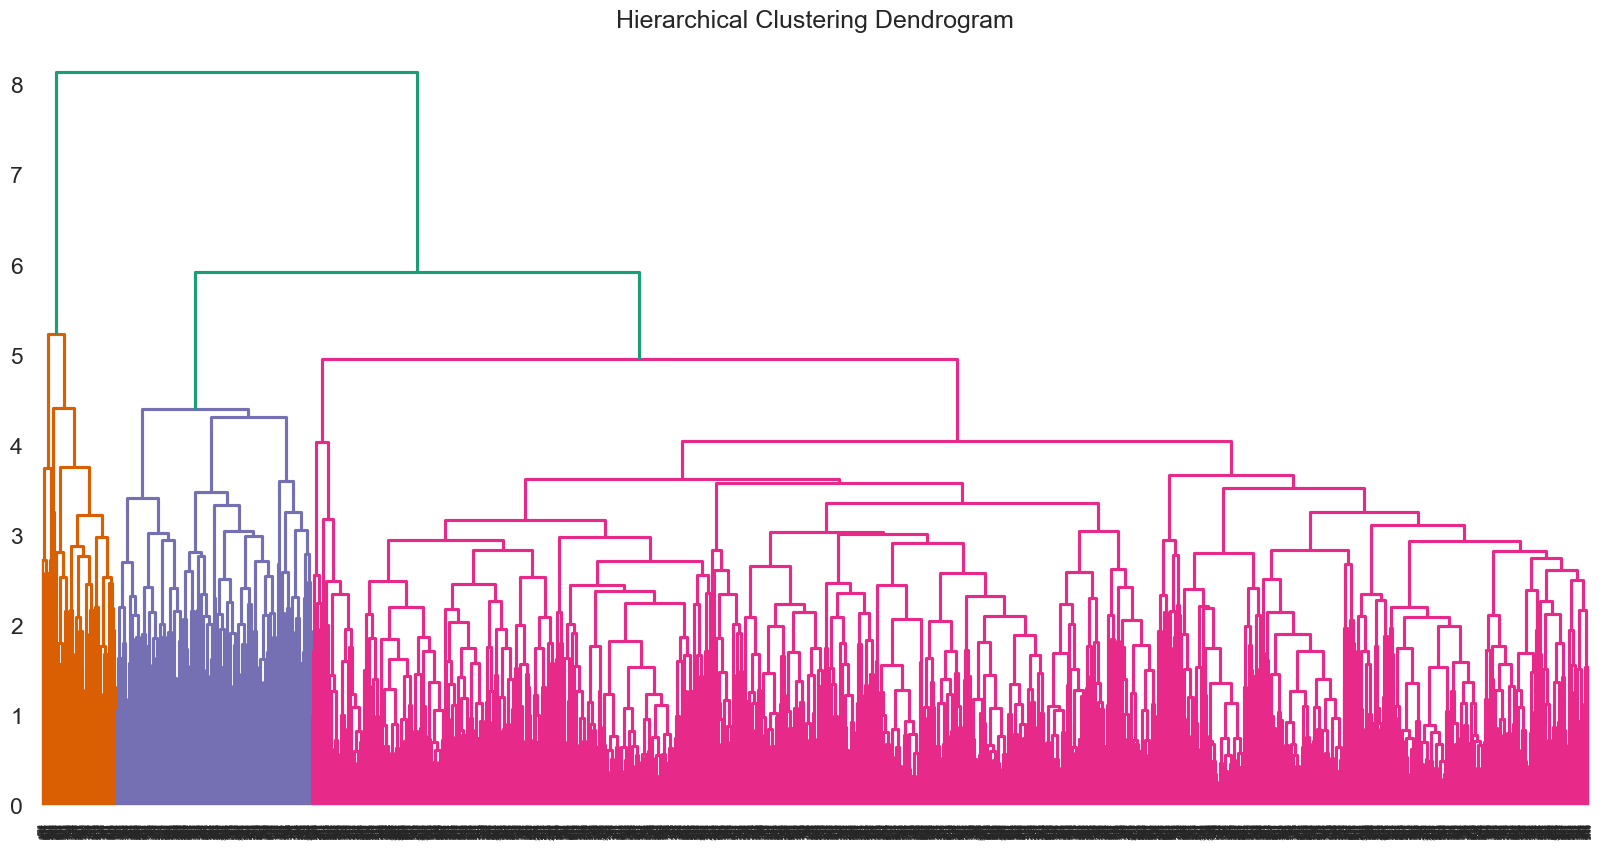

In [114]:
plot_dendrogram(success_rb, 'complete')

In [117]:
success['rb_complete2'] = AgglomerativeClustering(
    linkage='complete', n_clusters=2
    ).fit_predict(success_rb)

success['rb_complete3'] = AgglomerativeClustering(
    linkage='complete', n_clusters=3
    ).fit_predict(success_rb)

##### Ward

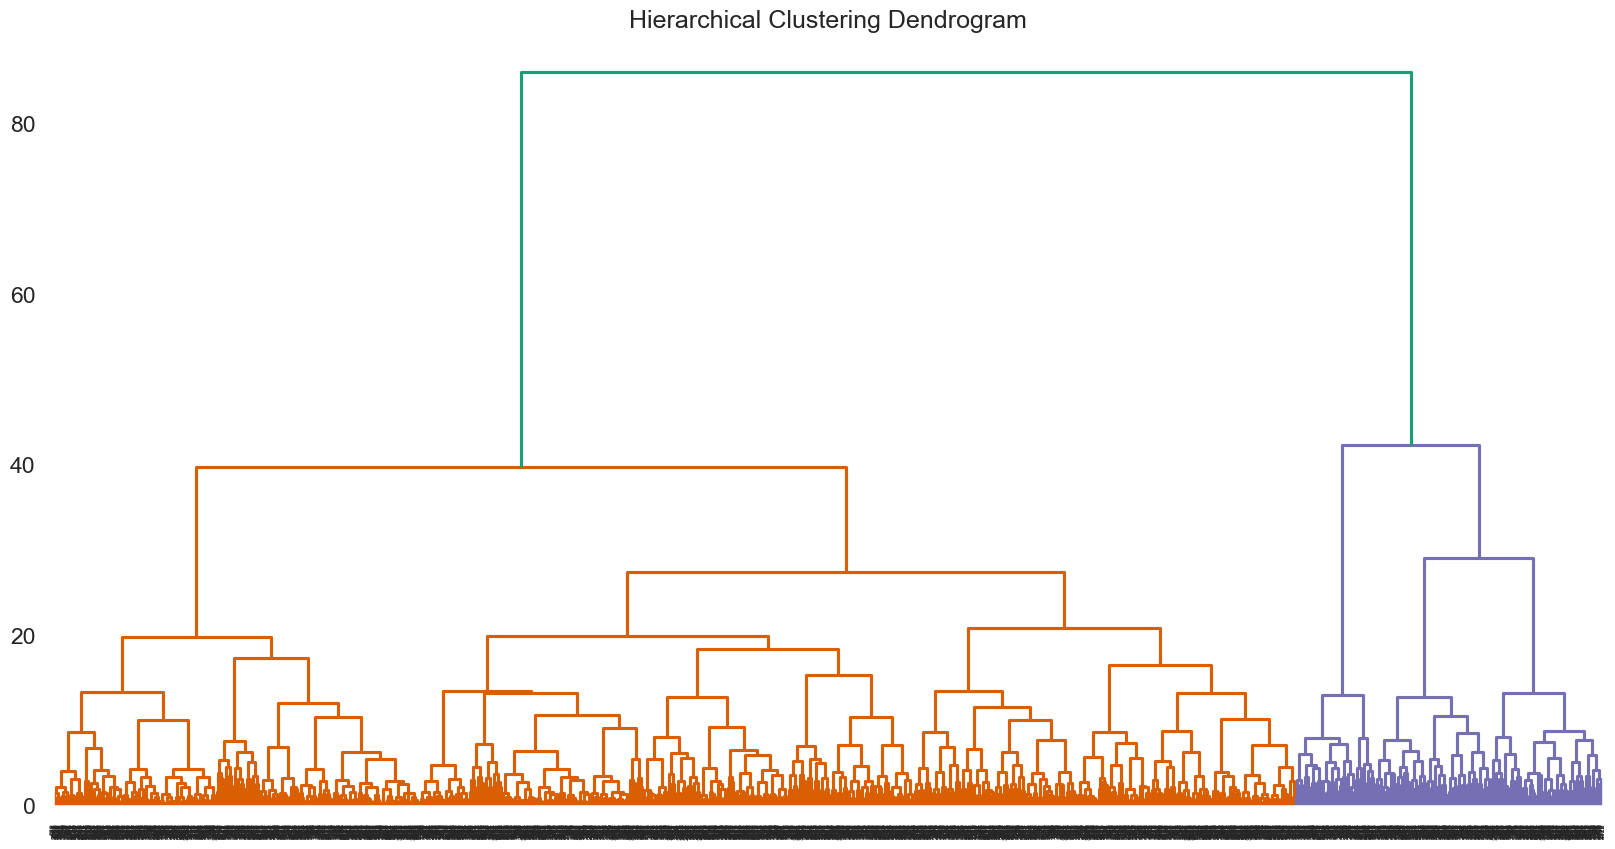

In [115]:
plot_dendrogram(success_rb, 'ward')

In [10]:
success['rb_ward2'] = AgglomerativeClustering(
    linkage='ward', n_clusters=2
    ).fit_predict(success_rb)

success['rb_ward4'] = AgglomerativeClustering(
    linkage='ward', n_clusters=4
    ).fit_predict(success_rb)

In [13]:
success['rb_ward2'].value_counts()

rb_ward2
0    3223
1     289
Name: count, dtype: int64

In [11]:
clusters_comparison(success, 'no_ward2', 'rb_ward2')

,rb_ward2 0 Cluster,rb_ward2 1 Cluster
no_ward2 0 Cluster,1858,174
no_ward2 1 Cluster,1365,115


In [121]:
clusters_comparison(success, 'rb_complete2', 'rb_ward2')

,rb_ward2 0 Cluster,rb_ward2 1 Cluster
rb_complete2 0 Cluster,522,2817
rb_complete2 1 Cluster,173,0


In [120]:
clusters_comparison(success, 'rb_complete3', 'rb_ward4')

,rb_ward4 0 Cluster,rb_ward4 1 Cluster,rb_ward4 2 Cluster,rb_ward4 3 Cluster
rb_complete3 0 Cluster,18,0,155,0
rb_complete3 1 Cluster,164,1901,0,831
rb_complete3 2 Cluster,335,84,23,1


In [12]:
groupby_mean(success, 'rb_ward2')

rb_ward2,0,1
Course area_Art,0.055849,0.190311
Course area_Business sciences,0.201986,0.235294
Course area_Engineering and related techniques,0.033509,0.020761
Course area_Health,0.232392,0.051903
Course area_Information and journalism,0.086255,0.010381
Course area_Personal services,0.061433,0.020761
Course area_Social services,0.132485,0.200692
Course area_Teacher training/trainers and education sciences,0.048402,0.034602
Course area_Veterinary sciences,0.082222,0.072664
Marital status,0.904747,0.795848


##### MeanShift

In [130]:
rb_meanshift = MeanShift(bandwidth=1.8, bin_seeding=True, n_jobs=-1).fit(success_rb)
success['rb_meanshift'] = rb_meanshift.labels_
success['rb_meanshift'].value_counts()

rb_meanshift
0    3319
1     100
2      93
Name: count, dtype: int64

In [ ]:
clusters_comparison(success, 'rb_ward2', 'rb_meanshift')

,rb_meanshift 0 Cluster,rb_meanshift 1 Cluster
rb_ward2 0 Cluster,330,48
rb_ward2 1 Cluster,3134,0


##### UMAP

c:\Users\Afonso Cadete\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
g:\O meu disco\Universidade\3rd year\2nd semester\Machine Learning\II\Project\utils2.py:387: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


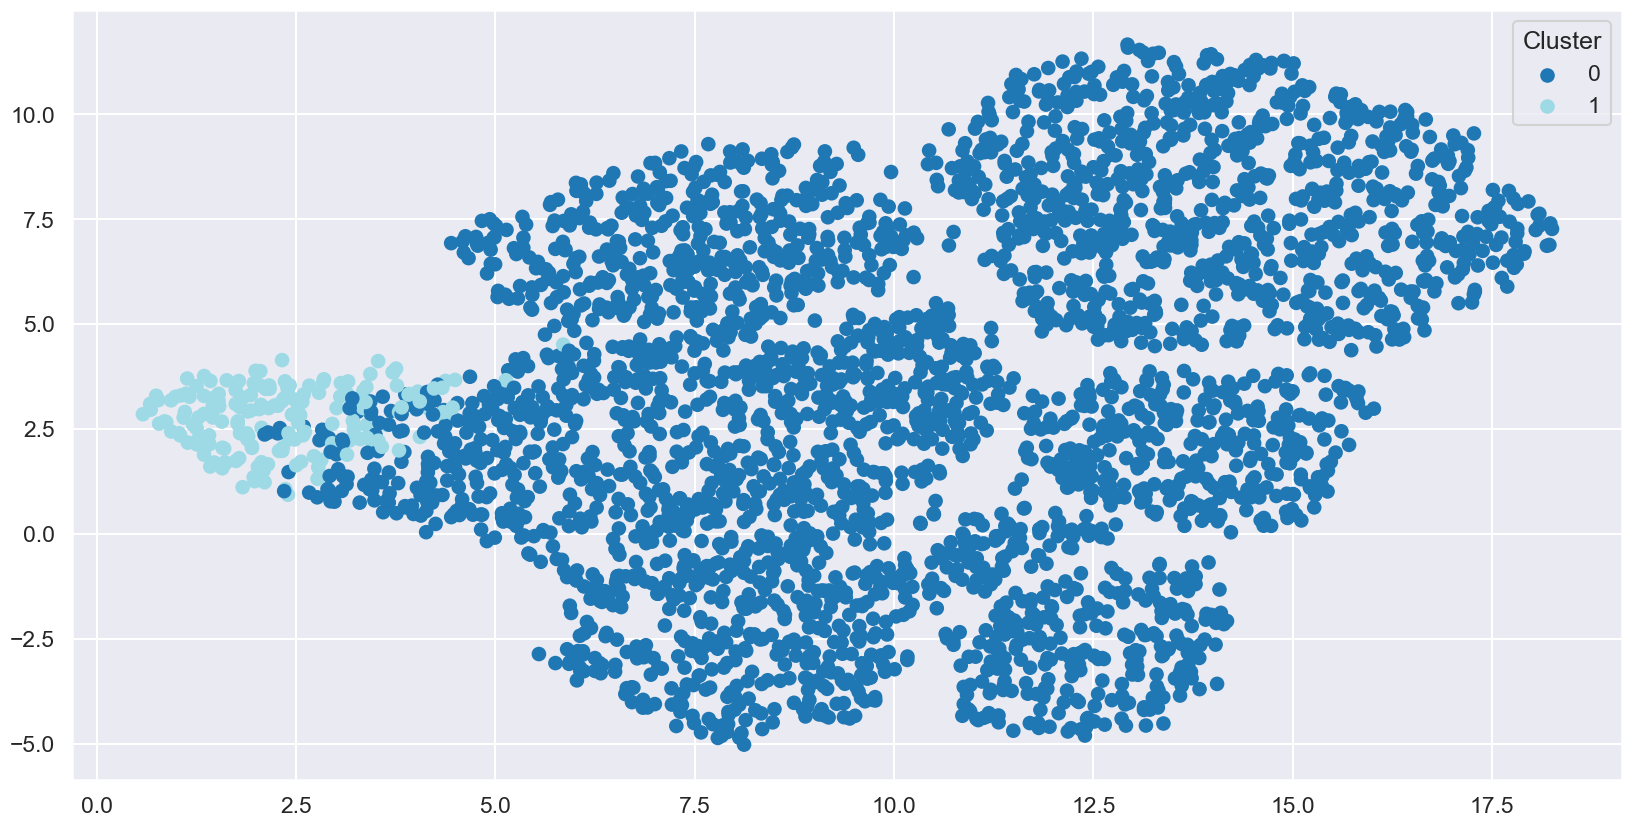

In [132]:
umap_object = umap.UMAP(n_neighbors=160, min_dist=1, random_state=16, n_jobs=-1)
umap_embedding = umap_object.fit_transform(success_rb)
visualize_dimensionality_reduction(umap_embedding, success['rb_complete2'])